In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("C:/Users/Admin/Downloads/results.csv")
df.head()


,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [2]:
df=df.drop("Unnamed: 0",axis=1)

In [3]:
df.head()

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,65,10,59,3,71,37,245,0,3
1,94,56,4,67,91,50,362,1,1
2,7,85,76,99,60,25,352,0,2
3,88,46,59,94,52,38,377,1,1
4,39,81,37,38,6,54,255,1,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Hindi      1000 non-null   int64
 1   English    1000 non-null   int64
 2   Science    1000 non-null   int64
 3   Maths      1000 non-null   int64
 4   History    1000 non-null   int64
 5   Geograpgy  1000 non-null   int64
 6   Total      1000 non-null   int64
 7   Results    1000 non-null   int64
 8   Div        1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hindi,1000.0,51.645,29.471912,0.0,26.00,53.0,77.00,99.0
English,1000.0,50.110,28.048505,0.0,26.00,50.5,75.00,99.0
Science,1000.0,49.440,28.921114,0.0,25.00,50.0,73.25,99.0
Maths,1000.0,49.553,28.632447,0.0,25.75,49.0,74.00,99.0
History,1000.0,49.034,28.769750,0.0,24.00,49.0,73.25,99.0
Geograpgy,1000.0,50.028,28.710268,0.0,26.00,49.0,75.00,99.0
Total,1000.0,299.810,71.865239,103.0,254.00,296.0,349.25,505.0
Results,1000.0,0.350,0.477208,0.0,0.00,0.0,1.00,1.0
Div,1000.0,1.856,0.904479,0.0,1.00,2.0,3.00,3.0


In [6]:
df.isnull().any()

Hindi        False
English      False
Science      False
Maths        False
History      False
Geograpgy    False
Total        False
Results      False
Div          False
dtype: bool

In [7]:
df.corr()

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
Hindi,1.000000,0.036455,0.037616,0.041240,-0.024652,-0.064189,0.420384,0.273680,-0.081679
English,0.036455,1.000000,-0.022411,-0.011269,-0.001812,0.052253,0.411884,0.255056,-0.067873
Science,0.037616,-0.022411,1.000000,0.056314,0.005605,0.028846,0.445319,0.276698,-0.068866
Maths,0.041240,-0.011269,0.056314,1.000000,0.011525,-0.001140,0.437754,0.285308,-0.110058
History,-0.024652,-0.001812,0.005605,0.011525,1.000000,-0.022318,0.387443,0.238060,-0.081133
Geograpgy,-0.064189,0.052253,0.028846,-0.001140,-0.022318,1.000000,0.395791,0.226652,-0.082183
Total,0.420384,0.411884,0.445319,0.437754,0.387443,0.395791,1.000000,0.622658,-0.196862
Results,0.273680,0.255056,0.276698,0.285308,0.238060,0.226652,0.622658,1.000000,-0.258817
Div,-0.081679,-0.067873,-0.068866,-0.110058,-0.081133,-0.082183,-0.196862,-0.258817,1.000000


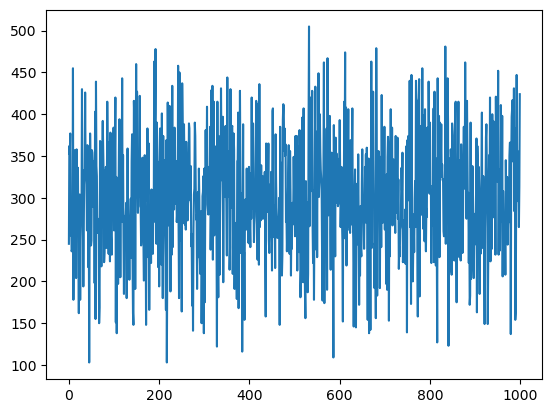

In [8]:
plt.plot(df["Total"])

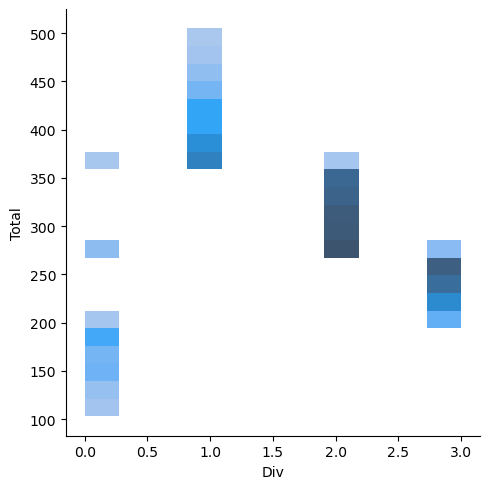

In [9]:
sns.displot(x=df["Div"],y=df["Total"])

In [10]:
x=df.drop("Results",axis=1)
y=df[["Results"]]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split as tts

In [12]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=5)
x_train.shape,y_train.shape

((800, 8), (800, 1))

# Logistic Regression

In [13]:
lo=LogisticRegression()
model=lo.fit(x_train,y_train)
y_pred=model.predict(x_test)
score_1=accuracy_score(y_test,y_pred)
score_1

0.79

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       132
           1       0.69      0.71      0.70        68

    accuracy                           0.79       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.79      0.79      0.79       200



In [15]:
confusion_matrix(y_test,y_pred)

array([[110,  22],
       [ 20,  48]], dtype=int64)

110 instances were correctly predicted as "not passing" (True Negatives, TN).

22 instances were incorrectly predicted as "passing" (False Positives, FP).

20 instances were incorrectly predicted as "not passing" (False Negatives, FN).

48 instances were correctly predicted as "passing" (True Positives, TP).

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
rmse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
adj_r2=1-float(len(y)-1)/(len(y)-len(lr.coef_)-1)*(1-r2)
rmse,r2,adj_r2

(0.14086985003341246, 0.3722377449491423, 0.37160872465350014)

# SVM

In [17]:
from sklearn.svm import SVC
model=SVC(C=10,kernel="linear",gamma=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
svm_cm=confusion_matrix(y_test,y_pred)
score_2=accuracy_score(y_test,y_pred)
score_2

0.79

In [18]:
svm_cm_int = svm_cm.astype(int)

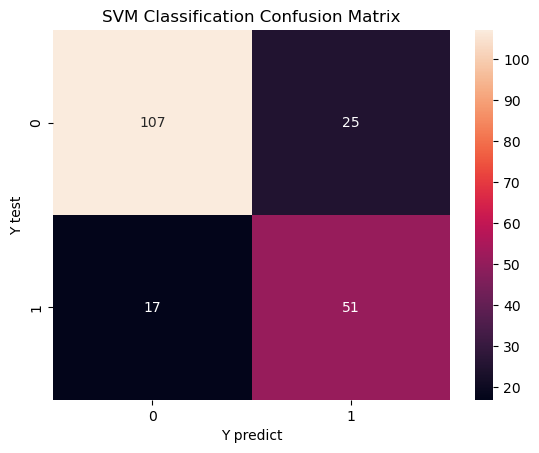

In [19]:
sns.heatmap(svm_cm_int,annot=True,fmt="d")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       132
           1       0.67      0.75      0.71        68

    accuracy                           0.79       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.80      0.79      0.79       200



A precision score of 0.86 for class 0 means that 86% of the samples predicted as class 0 were actually class 0, and a precision score of 0.67 for class 1 means that 67% of the samples predicted as class 1 were actually class 1.

A recall score of 0.81 for class 0 means that 81% of the actual class 0 samples were correctly classified as class 0, and a recall score of 0.75 for class 1 means that 75% of the actual class 1 samples were correctly classified as class 1.

It ranges from 0 to 1, where 1 is the best value. A higher F1-score indicates better performance.

Support is the number of actual occurrences of the class in the specified dataset. It's the number of samples in each class.

It measures the overall correctness of the model across all classes. In this case, the overall accuracy of the model is 0.79, which means 79% of the samples were correctly classified.

Macro average gives equal weight to each class, whereas weighted average takes the support of each class into account.

In [21]:
from sklearn.svm import SVC
model=SVC(C=10,kernel="rbf",gamma=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
svm_cm=confusion_matrix(y_test,y_pred)
score_3=accuracy_score(y_test,y_pred)
score_3

0.66

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model=nb.fit(x_train,y_train)
y_pred=model.predict(x_test)
score_4=accuracy_score(y_test,y_pred)
score_4

0.81

In [23]:
print(confusion_matrix(y_test,y_pred))

[[109  23]
 [ 15  53]]


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       132
           1       0.70      0.78      0.74        68

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200



In [25]:
nb_score=nb.score(x_test,y_test)
print(nb_score)

0.81


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
y_pred=model.predict(x_test)
score_5=accuracy_score(y_test,y_pred)
score_5

0.83

In [27]:
# Measure the performance of the model:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

mae,mse,rmse

(0.17, 0.17, 0.41231056256176607)

In [28]:
print(confusion_matrix(y_test,y_pred))

[[115  17]
 [ 17  51]]


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,bootstrap=True,max_features="sqrt")
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)
score_6=accuracy_score(y_test,y_pred)
score_6

0.925

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn import metrics

mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae,mse,rmse

(0.075, 0.075, 0.27386127875258304)

In [31]:
print(confusion_matrix(y_test,y_pred))

[[127   5]
 [ 10  58]]


# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
model=knn.fit(x_train,y_train)
y_pred=model.predict(x_test)
score_7=accuracy_score(y_test,y_pred)
score_7

0.85

In [33]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
mae,mse,rmse

(0.15, 0.15, 0.3872983346207417)

In [34]:
print(confusion_matrix(y_test,y_pred))

[[121  11]
 [ 19  49]]


Comparing for classification techniques

In [35]:
Testscores = pd.Series([score_1, score_2, score_3, score_4, score_5, score_6,score_7], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score_linear','Support Vector Machine Score_rbf', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score              0.790
Support Vector Machine Score_linear    0.790
Support Vector Machine Score_rbf       0.660
Naive Bayes Score                      0.810
Decision Tree Score                    0.830
Random Forest Score                    0.925
K-Nearest Neighbour Score              0.850
dtype: float64
